# Machine Leraning - Radial Basis Function..



In [1]:
# we have to select two different number 3 and 9 
# google drive. so we have to monunt
from google.colab import drive # /content/drive/MyDrive/project/MachineLearning/dataset/mnist.pkl
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import scipy.misc
from sklearn.metrics import accuracy_score

In [3]:
#
def load_data(dataset):
        f = open(dataset, 'r')
        rows = []
        for line in f:
            row = line.split()
            row[0] = float(row[0])
            row[1] = float(row[1])
            row[2] = int(row[2])
            rows.append(row)
            
        train_x = []
        train_y = []
        for x, y, z in rows:
            train_x.append((x, y))
            train_y.append(z)
            
        train_x = np.array(train_x)
        train_y = np.array(train_y)
        
        return train_x, train_y
        

In [4]:
def load_data_2(dataset):
    f = open(dataset, 'r')
    rows = []

    for line in f:
        row = line.split()
        row[0] = float(row[0])
        row[1] = float(row[1])
        rows.append(row)

    train_x = []
    train_y = []

    for x, y in rows:
        train_x.append(x)
        train_y.append(y)

    train_x = np.array(train_x)
    train_y = np.array(train_y)
    
    return train_x, train_y

In [5]:
def mean_squared_error(predict, label):
  error = 0
  for i in range(len(label)):
    error += np.linalg.norm(label-predict)**2
    error = error/len(label)
  print(error)
  return error

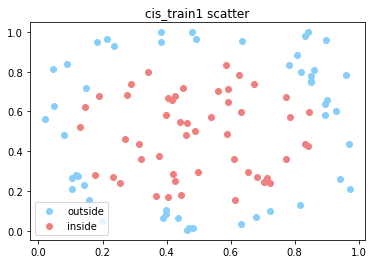

In [6]:
 if __name__ == '__main__': 
   
    train_x1, train_y1 = load_data("/content/drive/MyDrive/project/MachineLearning/dataset/cis_train1.txt")
    train_x2, train_y2 = load_data("/content/drive/MyDrive/project/MachineLearning/dataset/cis_train2.txt")
    test_x, test_y = load_data("/content/drive/MyDrive/project/MachineLearning/dataset/cis_test.txt")

    train_x1_1 = train_x1[np.where(train_y1==1)]
    train_x1_0 = train_x1[np.where(train_y1==0)]

    plt.scatter(train_x1_0[:,0], train_x1_0[:,1], c = "lightskyblue", label="outside")
    plt.scatter(train_x1_1[:,0], train_x1_1[:,1], c = "lightcoral", label="inside")
    plt.legend()
    plt.title('cis_train1 scatter')
    plt.show()


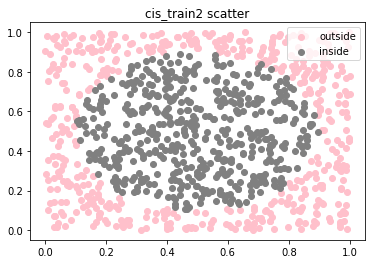

In [7]:
    train_x2_1 = train_x2[np.where(train_y2 == 1)]
    train_x2_0 = train_x2[np.where(train_y2 == 0)]
    plt.scatter(train_x2_0[:,0], train_x2_0[:,1], c = "pink", label="outside")
    plt.scatter(train_x2_1[:,0], train_x2_1[:,1], c = "gray", label="inside")
    plt.legend()
    plt.title('cis_train2 scatter')
    plt.show()

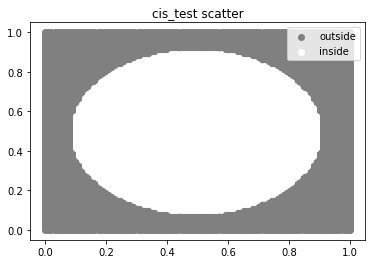

In [8]:
    test_x_1 = test_x[np.where(test_y==1)]
    test_x_0 = test_x[np.where(test_y==0)]

    plt.scatter(test_x_0[:,0], test_x_0[:,1], c = "gray", label="outside")
    plt.scatter(test_x_1[:,0], test_x_1[:,1], c = "white", label="inside")

    plt.legend()
    plt.title('cis_test scatter')
    plt.show()

In [9]:
def error_plot(e):
  error_list = []
  for i in range(len(9)):
    error_list.append(e)

  return error_list

In [10]:
class RBFN(object):
    def __init__(self, hidden_layer, variance=1.0):
        self.hidden_layer = hidden_layer
        self.variance = variance
        self.centers = None
        self.weights = None
        
    def gaussian(self, center, data_point):
        return np.exp(-self.variance*np.linalg.norm(center-data_point)**2)
    
    # basis for train
    def create_kernel_matrix(self, X):
        W = np.zeros((len(X), self.hidden_layer))
        for i, data_point in enumerate(X):
            for j, center in enumerate(self.centers):
                W[i, j] = self.gaussian(center, data_point)
        return W
    
    def find_centers(self, X):
        # for FA Center
#         random_args = np.random.choice(len(X), self.hidden_layer)
#         centers = X[random_args]
        
        km = KMeans(n_clusters=self.hidden_layer, max_iter = 100).fit(X)
        centers = km.cluster_centers_
        #print(k_centers)
        return centers
    
    def fit(self, X, Y):
        self.centers = self.find_centers(X)
        W = self.create_kernel_matrix(X)
        self.weights = np.dot(np.linalg.pinv(W), Y)
        
    def predict(self, X):
        W = self.create_kernel_matrix(X)
        predictions = np.dot(W, self.weights)
        
        return predictions, self.centers

In [11]:
    #knum = [2, 5, 10, 15, 20, 30, 40, 50, 55]
    knum = [2]
    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x1, train_y1)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

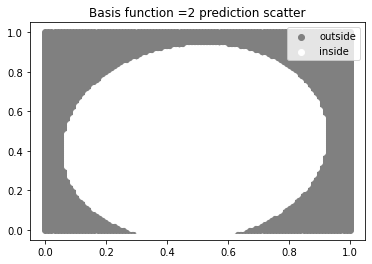

Basis function = 2 , accuracy:  1.752
0.1720361484325354


In [ ]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "gray", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "white", label="inside")
        plt.legend()

        plt.title('Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
        e1 = mean_squared_error1(predictions, predict)
        print(e1)

In [ ]:
    #knum = [2, 5, 10, 15, 20, 30, 40, 50, 55]
    knum = [2, 5]
    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x1, train_y1)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

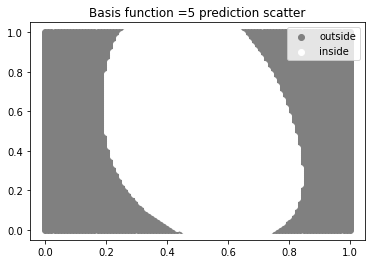

Basis function = 5 , accuracy:  1.6012
0.08183915438265561


In [ ]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "gray", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "white", label="inside")
        plt.legend()

        plt.title('Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
        e2 = mean_squared_error1(predictions, predict)
        print(e2)

In [ ]:
    #knum = [2, 5, 10, 15, 20, 30, 40, 50, 55]
    knum = [2, 5, 10]
    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x1, train_y1)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

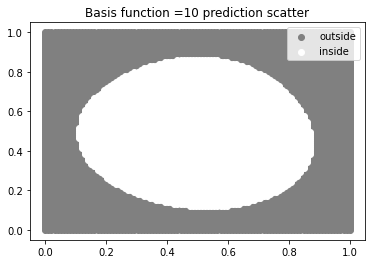

Basis function = 10 , accuracy:  0.9376
0.07559998516779864


In [ ]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "gray", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "white", label="inside")
        plt.legend()

        plt.title('Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)

        e3 = mean_squared_error1(predictions, predict)
        print(e3)

In [ ]:
    #knum = [2, 5, 10, 15, 20, 30, 40, 50, 55]
    knum = [2, 5, 10, 15]
    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x1, train_y1)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

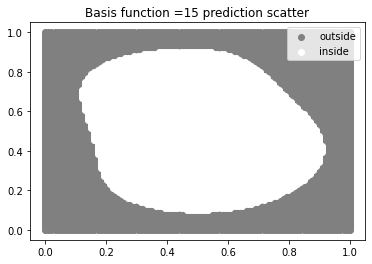

Basis function = 15 , accuracy:  0.9381
0.09017489413276397


In [ ]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "gray", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "white", label="inside")
        plt.legend()

        plt.title('Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)

        e4 = mean_squared_error1(predictions, predict)
        print(e4)

In [ ]:
    #knum = [2, 5, 10, 15, 20, 30, 40, 50, 55]
    knum = [2, 5, 10, 15, 20]
    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x1, train_y1)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

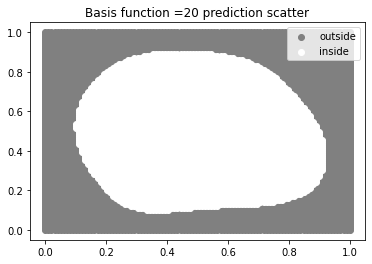

Basis function = 20 , accuracy:  0.9522
0.14881047850106918


In [ ]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "gray", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "white", label="inside")
        plt.legend()

        plt.title('Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
       
        e5 = mean_squared_error1(predictions, predict)
        print(e5)

In [ ]:
    #knum = [2, 5, 10, 15, 20, 30, 40, 50, 55]
    knum = [2, 5, 10, 15, 20, 30]
    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x1, train_y1)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

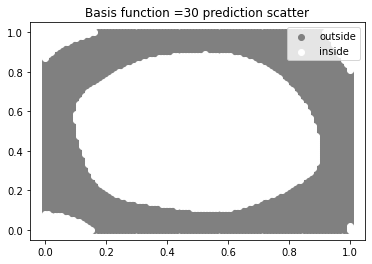

Basis function = 30 , accuracy:  0.945
0.07599792565856642


In [ ]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "gray", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "white", label="inside")
        plt.legend()

        plt.title('Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
       
        e6 = mean_squared_error1(predictions, predict)
        print(e6)

In [ ]:
    #knum = [2, 5, 10, 15, 20, 30, 40, 50, 55]
    knum = [2, 5, 10, 15, 20, 30, 40]
    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x1, train_y1)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

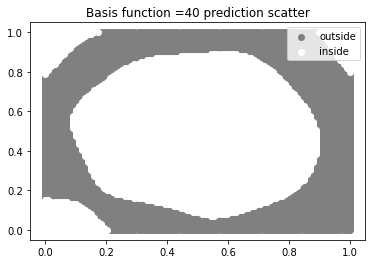

Basis function = 40 , accuracy:  0.9154
0.7621955466055917


In [ ]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "gray", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "white", label="inside")
        plt.legend()

        plt.title('Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
       
        e7 = mean_squared_error1(predictions, predict)
        print(e7)

In [ ]:
    #knum = [2, 5, 10, 15, 20, 30, 40, 50, 55]
    knum = [2, 5, 10, 15, 20, 30, 40, 50]
    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x1, train_y1)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

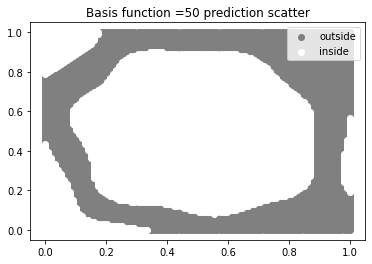

Basis function = 50 , accuracy:  0.8858
3.4945582414657954


In [ ]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "gray", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "white", label="inside")
        plt.legend()

        plt.title('Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
        e8 = mean_squared_error1(predictions, predict)
        print(e8)

In [ ]:
    #knum = [2, 5, 10, 15, 20, 30, 40, 50, 55]
    knum = [2, 5, 10, 15, 20, 30, 40, 50, 55]
    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x1, train_y1)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

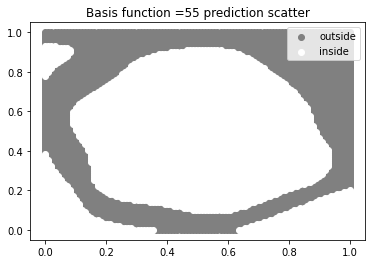

Basis function = 55 , accuracy:  0.8682
16.762678632601045


In [ ]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "gray", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "white", label="inside")
        plt.legend()

        plt.title('Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
        e9 = mean_squared_error1(predictions, predict)
        print(e9)

In [12]:
def mean_squared_error1(predict, label):
  #error = 0
  #for i in range(len(label)):
    #error += np.linalg.norm(label-predict)**2
    #error = error/len(label)
  #return error  
  return ((label-predict)**2).mean(axis=None)

In [ ]:
  print(mean_squared_error1(predictions, predict))

0.1720361484325354


In [ ]:
def mean_squared_error(predict, label):
  error = 0
  for i in range(len(label)):
    error += np.linalg.norm(label-predict)**2
    error = error/len(label)
  return error

In [ ]:
  print(mean_squared_error(predictions, predict))

10.700738622735845


In [ ]:
error_list = [] # [2, 5, 10, 15, 20, 30, 40, 50, 55]
error_list.append(e1) # basis f 2
error_list.append(e2) # basis f 5
error_list.append(e3) # 10
error_list.append(e4) # 15
error_list.append(e5) # 20
error_list.append(e6) # 30
error_list.append(e7) # 40 
error_list.append(e8) # 50
error_list.append(e9) # 55   
print(error_list) 

[0.1720361484325354, 0.08183915438265561, 0.07559998516779864, 0.09017489413276397, 0.14881047850106918, 0.07599792565856642, 0.7621955466055917, 3.4945582414657954, 16.762678632601045]


Text(0.5, 1.0, 'ERROR')

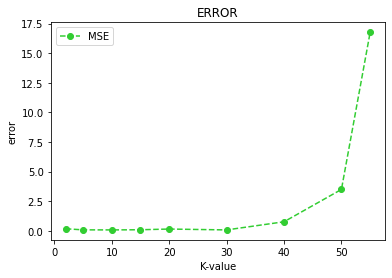

In [ ]:
plt.plot(knum, error_list, label = 'MSE', color="limegreen", marker = "o", linestyle = '--')
plt.legend()
plt.xlabel("K-value")
plt.ylabel("error")
plt.title("ERROR")
#k-value correspending MSE...

In [19]:
    knum = [2]

    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x2, train_y2)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

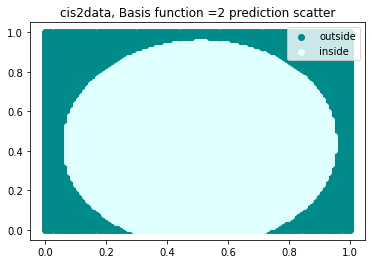

Basis function = 2 , accuracy:  0.8231
0.16520757216271276


In [20]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "darkcyan", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "lightcyan", label="inside")
        plt.legend()

        plt.title('cis2data, Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
        e2_1 = mean_squared_error1(predictions, predict)
        print(e2_1)

In [21]:
    knum = [2, 5]

    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x2, train_y2)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

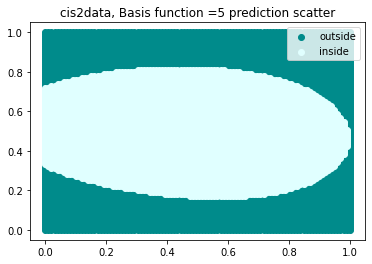

Basis function = 5 , accuracy:  0.8389
0.07441944931716456


In [22]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "darkcyan", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "lightcyan", label="inside")
        plt.legend()

        plt.title('cis2data, Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
        e2_2 = mean_squared_error1(predictions, predict)
        print(e2_2)

In [23]:
    knum = [2, 5, 10]

    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x2, train_y2)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

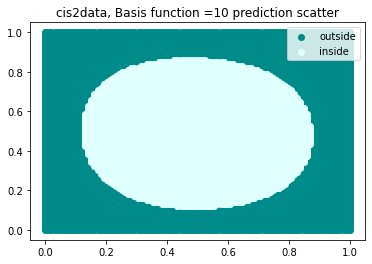

Basis function = 10 , accuracy:  0.944
0.0653424681270354


In [24]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "darkcyan", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "lightcyan", label="inside")
        plt.legend()

        plt.title('cis2data, Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
        e2_3 = mean_squared_error1(predictions, predict)
        print(e2_3)

In [25]:
    knum = [2, 5, 10, 15]

    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x2, train_y2)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

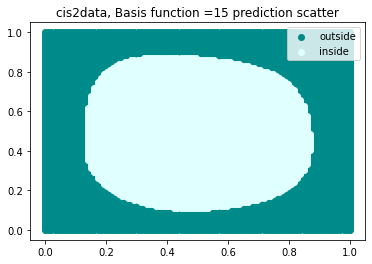

Basis function = 15 , accuracy:  0.9585
0.06440190765550631


In [26]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "darkcyan", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "lightcyan", label="inside")
        plt.legend()

        plt.title('cis2data, Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
        e2_4 = mean_squared_error1(predictions, predict)
        print(e2_4)

In [27]:
    knum = [2, 5, 10, 15, 20]

    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x2, train_y2)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

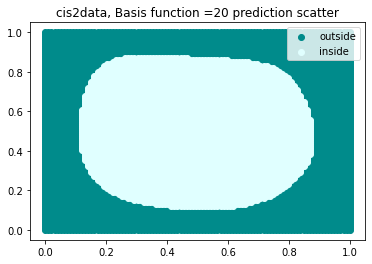

Basis function = 20 , accuracy:  0.9639
0.06111391679135668


In [28]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "darkcyan", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "lightcyan", label="inside")
        plt.legend()

        plt.title('cis2data, Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
        e2_5 = mean_squared_error1(predictions, predict)
        print(e2_5)

In [30]:
    knum = [2, 5, 10, 15, 20, 30]

    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x2, train_y2)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

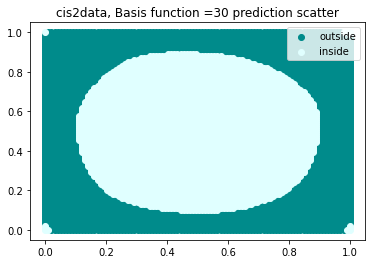

Basis function = 30 , accuracy:  0.983
0.04590126166967534


In [31]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "darkcyan", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "lightcyan", label="inside")
        plt.legend()

        plt.title('cis2data, Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
        e2_6 = mean_squared_error1(predictions, predict)
        print(e2_6)

In [32]:
    knum = [2, 5, 10, 15, 20, 30, 40]

    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x2, train_y2)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

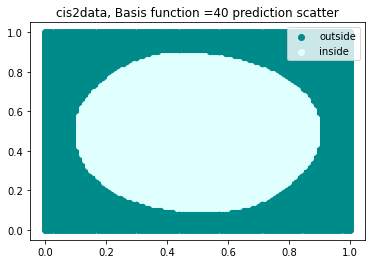

Basis function = 40 , accuracy:  0.9784
0.03693211863250832


In [33]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "darkcyan", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "lightcyan", label="inside")
        plt.legend()

        plt.title('cis2data, Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
        e2_7 = mean_squared_error1(predictions, predict)
        print(e2_7)

In [34]:
    knum = [2, 5, 10, 15, 20, 30, 40, 50]

    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x2, train_y2)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

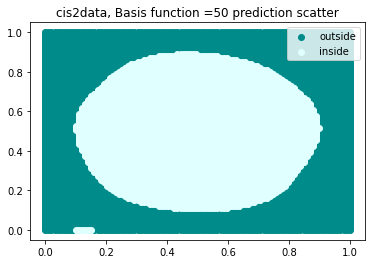

Basis function = 50 , accuracy:  0.9801
0.03628187636784745


In [35]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "darkcyan", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "lightcyan", label="inside")
        plt.legend()

        plt.title('cis2data, Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
        e2_8 = mean_squared_error1(predictions, predict)
        print(e2_8)

In [36]:
    knum = [2, 5, 10, 15, 20, 30, 40, 50, 55]

    for i, k in enumerate(knum):
        model = RBFN(hidden_layer=k, variance=2.)
        model.fit(train_x2, train_y2)
        predictions, centers = model.predict(test_x)

        predict=[]
        for i in predictions:
            if(i > 0.5):
                predict.append(1)
            else:
                predict.append(0)

        predict = np.array(predict)
        correct = 0

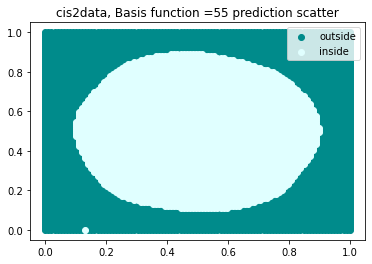

Basis function = 55 , accuracy:  0.9828
0.03607567599303644


In [37]:
        for i in range(test_y.size):
            if(test_y[i] == predict[i]):
                correct = correct + 1
        accuracy = correct/test_y.size

        predict_1 = test_x[np.where(predict==1)]
        predict_0 = test_x[np.where(predict==0)]

        plt.scatter(predict_0[:,0], predict_0[:,1], c = "darkcyan", label="outside")
        plt.scatter(predict_1[:,0], predict_1[:,1], c = "lightcyan", label="inside")
        plt.legend()

        plt.title('cis2data, Basis function =%d prediction scatter' %(k))
        plt.show()
        print("Basis function =", k, ", accuracy: ", accuracy)
        e2_9 = mean_squared_error1(predictions, predict)
        print(e2_9)

In [39]:
error_list2 = [] # [2, 5, 10, 15, 20, 30, 40, 50, 55]
error_list2.append(e2_1) # basis f 2
error_list2.append(e2_2) # basis f 5
error_list2.append(e2_3) # 10
error_list2.append(e2_4) # 15
error_list2.append(e2_5) # 20
error_list2.append(e2_6) # 30
error_list2.append(e2_7) # 40 
error_list2.append(e2_8) # 50
error_list2.append(e2_9) # 55   
print(error_list2) 

[0.16520757216271276, 0.07441944931716456, 0.0653424681270354, 0.06440190765550631, 0.06111391679135668, 0.04590126166967534, 0.03693211863250832, 0.03628187636784745, 0.03607567599303644]


Text(0.5, 1.0, 'cis2-ERROR')

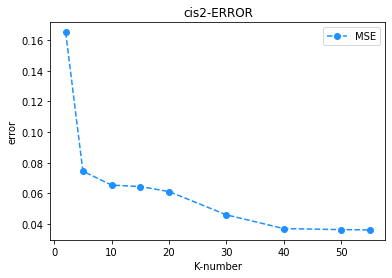

In [41]:
plt.plot(knum, error_list2, label = 'MSE', color="dodgerblue", marker = "o", linestyle = '--')
plt.legend()
plt.xlabel("K-number")
plt.ylabel("error")
plt.title("cis2-ERROR")
#k-value correspending MSE...

In [ ]:
 if __name__ == '__main__': 
    fa_train_x1, fa_train_y1 = load_data_2("/content/drive/MyDrive/project/MachineLearning/dataset/fa_train1.txt")
    fa_train_x2, fa_train_y2 = load_data_2("/content/drive/MyDrive/project/MachineLearning/dataset/fa_train2.txt")
    fa_test_x, fa_test_y = load_data_2("/content/drive/MyDrive/project/MachineLearning/dataset/fa_test.txt")


In [ ]:
  fa_train_x1.sort()
  fa_train_y1.sort()
  fa_train_x2.sort()
  fa_train_y2.sort()
  fa_test_x.sort()
  fa_test_y.sort() # each other value sorting

In [ ]:
import numpy as np


class RBFs:
    def __init__(self, hidden_shape, sigma=1.0):
        self.hidden_shape = hidden_shape
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def _kernel_function(self, center, data_point):
        return np.exp(-self.sigma*np.linalg.norm(center-data_point)**2)

    def _calculate_interpolation_matrix(self, x):
        matrix = np.zeros((len(x), self.hidden_shape))
        for data_point_arg, data_point in enumerate(x):
            for center_arg, center in enumerate(self.centers):
                matrix[data_point_arg, center_arg] = self._kernel_function(
                        center, data_point)
        return matrix

    def _select_centers(self, y):
        random_args = np.random.choice(len(y), self.hidden_shape)
        centers = y[random_args]
        return centers

    def fit(self, x, y):
        self.centers = self._select_centers(x)
        matrix = self._calculate_interpolation_matrix(x)
        self.weights = np.dot(np.linalg.pinv(matrix), y)

    def predict(self, x):
        matrix = self._calculate_interpolation_matrix(x)
        predictions = np.dot(matrix, self.weights)
        return predictions

In [ ]:
model = RBFs(hidden_shape= 10, sigma= 1.)
model.fit(fa_train_x1, fa_train_y1)
predict_y = model.predict(fa_train_x1)
print(predict_y)


[0.04199219 0.2701416  0.36779785 0.37780762 0.37487793 0.37390137
 0.43322754 0.45361328 0.4888916  0.49462891 0.54675293 0.57507324
 0.59313965 0.64038086 0.66088867 0.69616699 0.71020508 0.81677246
 0.87976074 0.86724854]


Text(0.5, 1.0, 'K= 10 fa_x1_function')

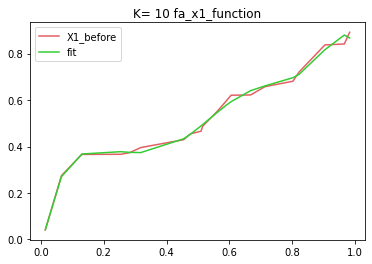

In [ ]:
plt.plot(fa_train_x1, fa_train_y1, color = "#e35f62", label = "X1_before")
plt.plot(fa_train_x1, predict_y, color = "limegreen", label = "fit")
plt.legend()
plt.title("K= 10 fa_x1_function")

In [ ]:
model = RBFs(hidden_shape= 20, sigma= 1.)
model.fit(fa_train_x1, fa_train_y1)
predict_y = model.predict(fa_train_x1)
print(predict_y)

[0.03868103 0.28274536 0.35248566 0.38375092 0.38034821 0.37361145
 0.42110443 0.44603729 0.48912048 0.49578857 0.55556488 0.58399963
 0.60036469 0.63389587 0.64580536 0.6968689  0.71767426 0.82006836
 0.86402893 0.87756348]


Text(0.5, 1.0, 'K= 20 fa_x1_function')

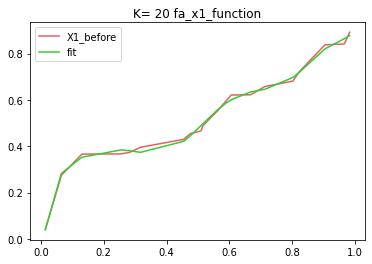

In [ ]:
plt.plot(fa_train_x1, fa_train_y1, color = "#e35f62", label = "X1_before")
plt.plot(fa_train_x1, predict_y, color = "limegreen", label = "fit")
plt.legend()
plt.title("K= 20 fa_x1_function")

In [ ]:
model = RBFs(hidden_shape= 50, sigma= 1.)
model.fit(fa_train_x1, fa_train_y1)
predict_y = model.predict(fa_train_x1)
print(predict_y)

[0.03950882 0.2836647  0.35361481 0.38502121 0.38148499 0.37468719
 0.42246628 0.44732666 0.49043274 0.49715424 0.55679703 0.58520126
 0.60150146 0.63527298 0.64732742 0.69821358 0.71889496 0.82120132
 0.86567307 0.87852287]


Text(0.5, 1.0, 'K= 50 fa_x1_function')

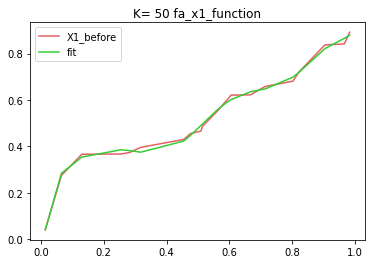

In [ ]:
plt.plot(fa_train_x1, fa_train_y1, color = "#e35f62", label = "X1_before")
plt.plot(fa_train_x1, predict_y, color = "limegreen", label = "fit")
plt.legend()
plt.title("K= 50 fa_x1_function")

In [ ]:
model = RBFs(hidden_shape= 10, sigma= 1.)
model.fit(fa_train_x2, fa_train_y2)
predict_y = model.predict(fa_train_x2)
print(predict_y)

[0.05740356 0.04616547 0.04524994 0.03726959 0.03695679 0.03508759
 0.06633759 0.15135193 0.15306854 0.18225861 0.20797729 0.20898438
 0.23243713 0.28653717 0.29074097 0.32411957 0.32774353 0.33663177
 0.35364532 0.35890961 0.36389923 0.36437988 0.37663269 0.38258362
 0.38282776 0.38287354 0.38302612 0.38176727 0.38117981 0.3790741
 0.37698364 0.37220764 0.37495422 0.38699341 0.38853455 0.39031982
 0.39179993 0.40138245 0.40562439 0.40730286 0.41192627 0.41323853
 0.43087769 0.43104553 0.43753052 0.44308472 0.4535675  0.45606995
 0.47470093 0.47512817 0.49401855 0.49972534 0.50024414 0.5019989
 0.50419617 0.52398682 0.53457642 0.53594971 0.55775452 0.57315063
 0.58535767 0.60948181 0.610672   0.62214661 0.62324524 0.62692261
 0.63020325 0.6519928  0.66027832 0.66560364 0.66622925 0.66743469
 0.66752625 0.6680603  0.66856384 0.67018127 0.67199707 0.67233276
 0.67349243 0.67346191 0.67651367 0.67672729 0.68070984 0.68484497
 0.72157288 0.75553894 0.7795105  0.78315735 0.78657532 0.787918

Text(0.5, 1.0, 'K= 10 fa_x2_function')

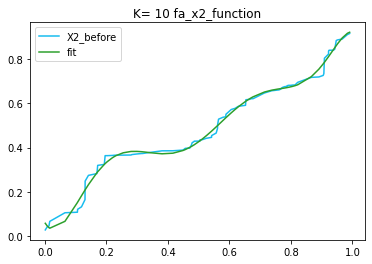

In [ ]:
plt.plot(fa_train_x2, fa_train_y2, color = "#17bcef", label = "X2_before")
plt.plot(fa_train_x2, predict_y, color = "#2ca02c", label = "fit")
plt.legend()
plt.title("K= 10 fa_x2_function")

In [ ]:
model = RBFs(hidden_shape= 20, sigma= 1.)
model.fit(fa_train_x2, fa_train_y2)
predict_y = model.predict(fa_train_x2)
print(predict_y)

[0.05871201 0.04689217 0.04608154 0.0376358  0.03722382 0.03525543
 0.06620979 0.15199661 0.15359879 0.1830864  0.20885086 0.20989227
 0.2334404  0.2874527  0.29171562 0.32488251 0.32842636 0.33730316
 0.35417557 0.3593998  0.36430359 0.364851   0.37702942 0.38294792
 0.38315964 0.38324928 0.38345909 0.38218117 0.38162041 0.37957191
 0.37754822 0.37308121 0.3759346  0.38801193 0.3894558  0.39129448
 0.39273453 0.40221596 0.40650558 0.40817261 0.41273499 0.41403198
 0.43152809 0.43169022 0.43808365 0.44360733 0.45401955 0.45655823
 0.47511864 0.47556114 0.49432564 0.50002861 0.50052261 0.50233841
 0.50443649 0.52419472 0.53476524 0.53611565 0.55799675 0.5735054
 0.58572388 0.61006546 0.61121368 0.62283707 0.62395287 0.62767029
 0.63100052 0.65291214 0.66127205 0.66643715 0.66709518 0.66822815
 0.66830254 0.6688385  0.6693573  0.67088699 0.67256165 0.67280388
 0.6739521  0.67398453 0.6767807  0.67705154 0.68088913 0.68497849
 0.72118187 0.75537682 0.77951813 0.78333473 0.78675079 0.78809

Text(0.5, 1.0, 'K= 20 fa_x2_function')

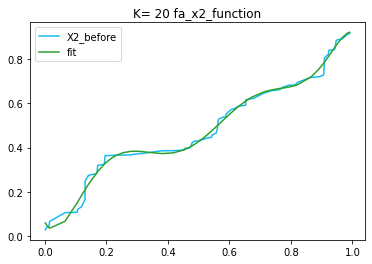

In [ ]:
plt.plot(fa_train_x2, fa_train_y2, color = "#17bcef", label = "X2_before")
plt.plot(fa_train_x2, predict_y, color = "#2ca02c", label = "fit")
plt.legend()
plt.title("K= 20 fa_x2_function")

In [ ]:
model = RBFs(hidden_shape= 50, sigma= 1.)
model.fit(fa_train_x2, fa_train_y2)
predict_y = model.predict(fa_train_x2)
print(predict_y)

[0.05888224 0.04695654 0.04613447 0.03760338 0.03719044 0.03519821
 0.06607151 0.15200329 0.15361786 0.18313789 0.20892143 0.20995808
 0.23352051 0.28753376 0.29179192 0.32492352 0.32846642 0.33733082
 0.35418034 0.35939217 0.36428833 0.36483479 0.37697792 0.38288212
 0.38309669 0.38318634 0.38340187 0.3821373  0.38158035 0.37954903
 0.37754154 0.37311554 0.37601185 0.38807583 0.38952351 0.39135551
 0.39278603 0.40225697 0.40653992 0.40819931 0.41275883 0.41405201
 0.43152905 0.43168736 0.4380722  0.44358253 0.45398808 0.45652294
 0.47505379 0.47549629 0.4942503  0.49994659 0.5004425  0.50225067
 0.50434971 0.5240984  0.53466797 0.536026   0.55791378 0.57342911
 0.58565521 0.61002922 0.61117554 0.62282467 0.62394905 0.62766743
 0.6310091  0.65296745 0.66131973 0.66646481 0.66712379 0.66824722
 0.66832161 0.66884708 0.66936779 0.6708765  0.67252827 0.67276955
 0.67390251 0.67392921 0.67670918 0.6769743  0.68078136 0.68483639
 0.72096443 0.75520134 0.77938938 0.78321362 0.78663349 0.7879

Text(0.5, 1.0, 'K= 50 fa_x2_function')

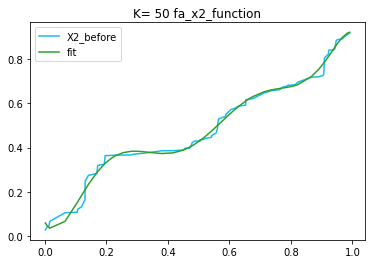

In [ ]:
plt.plot(fa_train_x2, fa_train_y2, color = "#17bcef", label = "X2_before")
plt.plot(fa_train_x2, predict_y, color = "#2ca02c", label = "fit")
plt.legend()
plt.title("K= 50 fa_x2_function")

In [ ]:
model = RBFs(hidden_shape= 20, sigma= 1.)
model.fit(fa_test_x, fa_test_y)
predict_y = model.predict(fa_test_x)
print(predict_y)

Text(0.5, 1.0, 'K= 20 fa_x2_function')

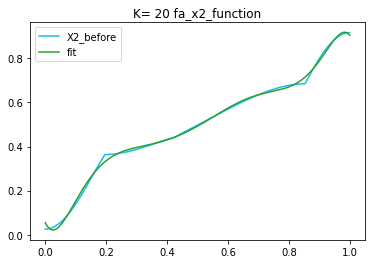

In [ ]:
plt.plot(fa_test_x, fa_test_y, color = "#17bcef", label = "X2_before")
plt.plot(fa_test_x, predict_y, color = "#2ca02c", label = "fit")
plt.legend()
plt.title("K= 20 fa_x2_function")

In [ ]:
x = fa_train_x1
y = np.power(fa_train_x1, 2)

model = RBFs(hidden_shape= 10, sigma=1.)
model.fit(x, y)
predict_y = model.predict(x)
print(predict_y)

[1.65381527e-04 4.20752936e-03 1.69292631e-02 6.46695748e-02
 7.95864637e-02 1.00937654e-01 2.06595729e-01 2.27109571e-01
 2.60225355e-01 2.65408350e-01 3.15340016e-01 3.45355931e-01
 3.67041719e-01 4.45986569e-01 5.09708740e-01 6.44827473e-01
 6.75845883e-01 8.18902922e-01 9.34485193e-01 9.67660088e-01]


Text(0.5, 1.0, 'y^2, fa_x1_function')

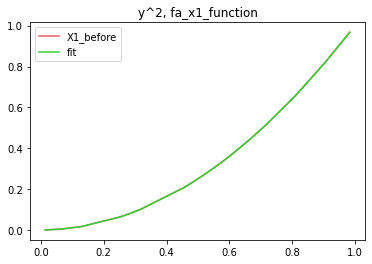

In [ ]:
plt.plot(fa_train_x1, y, color = "#e35f62", label = "X1_before")
plt.plot(x, predict_y, color = "limegreen", label = "fit")
plt.legend()
plt.title("y^2, fa_x1_function") # ^2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# fitting RBF-Network with data
model = RBFN(hidden_layer= 10, variance= 2.)
model.fit(fa_train_x2, fa_train_y2)
y_pred = model.predict(fa_train_x2)

# plotting 1D interpolation
plt.plot(fa_train_x2, fa_train_y2, 'b-', label='real')
plt.plot(fa_train_x2, y_pred, 'r-', label='fit')
plt.legend(loc='upper right')
plt.title('Interpolation using a RBFN')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)

In [ ]:
def kmeans(X, k):
    """Performs k-means clustering for 1D input
    
    Arguments:
        X {ndarray} -- A Mx1 array of inputs
        k {int} -- Number of clusters
    
    Returns:
        ndarray -- A kx1 array of final cluster centers
    """

    # randomly select initial clusters from input data
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False

    while not converged:
        """
        compute distances for each cluster center to each point 
        where (distances[i, j] represents the distance between the ith point and jth cluster)
        """
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))

        # find the cluster that's closest to each point
        closestCluster = np.argmin(distances, axis=1)

        # update clusters by taking the mean of all of the points assigned to that cluster
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)

        # converge if clusters haven't moved
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()

    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)

    clustersWithNoPoints = []
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            # keep track of clusters with no points or 1 point
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])

    # if there are clusters with 0 or 1 points, take the mean std of the other clusters
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))

    return clusters, stds

In [ ]:
class RBFNet(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds

        self.w = np.random.randn(k)
        self.b = np.random.randn(1)

    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = kmeans(X, self.k)
        else:
            # use a fixed std 
            self.centers, _ = kmeans(X, self.k)
            dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)

        # training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b

                loss = (y[i] - F).flatten() ** 2
                #print('Loss: {0:.2f}'.format(loss[0]))

                # backward pass
                error = -(y[i] - F).flatten()

                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(F)
        return np.array(y_pred)

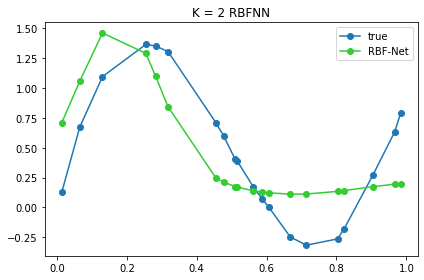

In [ ]:
X = fa_train_x1
X = np.sort(X, axis=0)
noise = fa_train_y1
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=2, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "#1f77b4")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "limegreen")
plt.legend()

plt.title("K = 2 RBFNN")
plt.tight_layout()
plt.show()

# plot reference
# https://codetorial.net/matplotlib/set_color.html 

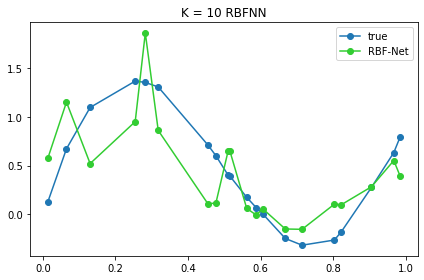

In [ ]:
X = fa_train_x1
X = np.sort(X, axis=0)
noise = fa_train_y1
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=10, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "#1f77b4")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "limegreen")
plt.legend()

plt.title("K = 10 RBFNN")
plt.tight_layout()
plt.show()

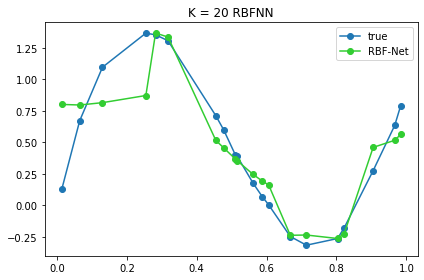

In [ ]:
X = fa_train_x1
X = np.sort(X, axis=0)
noise = fa_train_y1
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=20, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "#1f77b4")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "limegreen")
plt.legend()

plt.title("K = 20 RBFNN")
plt.tight_layout()
plt.show()

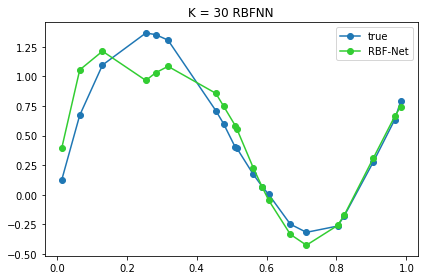

In [ ]:
X = fa_train_x1
X = np.sort(X, axis=0)
noise = fa_train_y1
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=30, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "#1f77b4")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "limegreen")
plt.legend()

plt.title("K = 30 RBFNN")
plt.tight_layout()
plt.show()

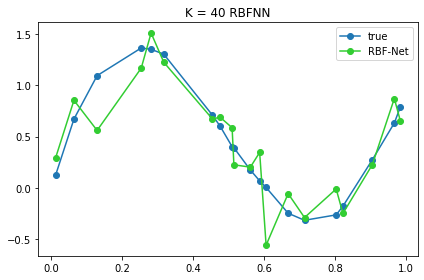

In [ ]:
X = fa_train_x1
X = np.sort(X, axis=0)
noise = fa_train_y1
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=40, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "#1f77b4")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "limegreen")
plt.legend()

plt.title("K = 40 RBFNN")
plt.tight_layout()
plt.show()

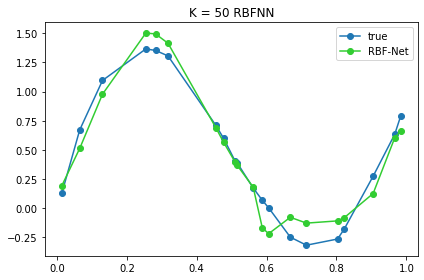

In [ ]:
X = fa_train_x1
X = np.sort(X, axis=0)
noise = fa_train_y1
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=50, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "#1f77b4")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "limegreen")
plt.legend()

plt.title("K = 50 RBFNN")
plt.tight_layout()
plt.show()

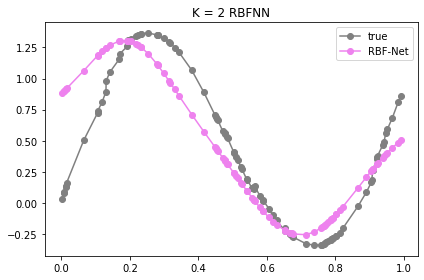

In [ ]:
X = fa_train_x2
X = np.sort(X, axis=0)
noise = fa_train_y2
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=2, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "gray")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "violet")
plt.legend()

plt.title("K = 2 RBFNN")
plt.tight_layout()
plt.show()

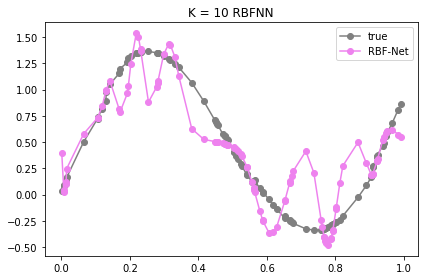

In [ ]:
X = fa_train_x2 # fa_train_x2
X = np.sort(X, axis=0)
noise = fa_train_y2
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=10, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "gray")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "violet")
plt.legend()

plt.title("K = 10 RBFNN")
plt.tight_layout()
plt.show()

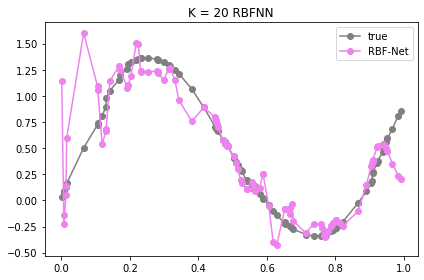

In [ ]:
X = fa_train_x2
X = np.sort(X, axis=0)
noise = fa_train_y2
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=20, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "gray")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "violet")
plt.legend()

plt.title("K = 20 RBFNN")
plt.tight_layout()
plt.show()

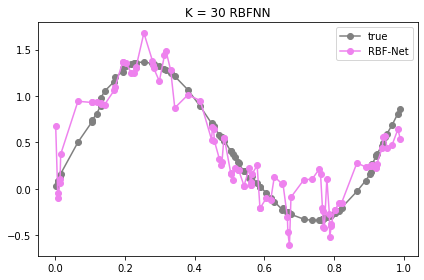

In [ ]:
X = fa_train_x2
X = np.sort(X, axis=0)
noise = fa_train_y2
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=30, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "gray")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "violet")
plt.legend()

plt.title("K = 30 RBFNN")
plt.tight_layout()
plt.show()

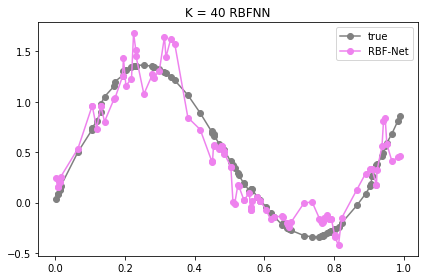

In [ ]:
X = fa_train_x2
X = np.sort(X, axis=0)
noise = fa_train_y2
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=40, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "gray")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "violet")
plt.legend()

plt.title("K = 40 RBFNN")
plt.tight_layout()
plt.show()

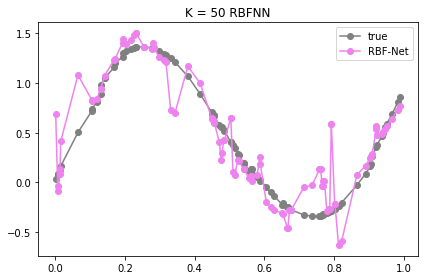

In [ ]:
X = fa_train_x2
X = np.sort(X, axis=0)
noise = fa_train_y2
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=50, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "gray")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "violet")
plt.legend()

plt.title("K = 50 RBFNN")
plt.tight_layout()
plt.show()

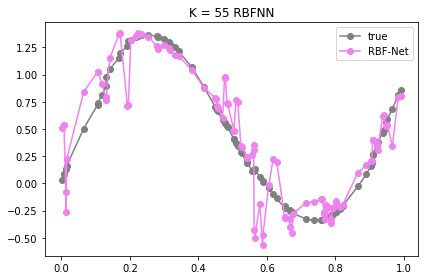

In [ ]:
X = fa_train_x2
X = np.sort(X, axis=0)
noise = fa_train_y2
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=55, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "gray")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "violet")
plt.legend()

plt.title("K = 55 RBFNN")
plt.tight_layout()
plt.show()

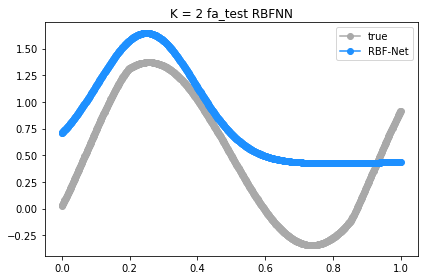

In [ ]:
X = fa_test_x
X = np.sort(X, axis=0)
noise = fa_test_y
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=2, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "darkgray")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "dodgerblue")
plt.legend()

plt.title("K = 2 fa_test RBFNN")
plt.tight_layout()
plt.show()

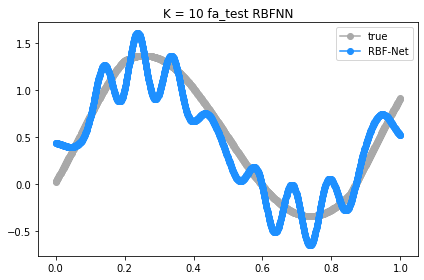

In [ ]:
X = fa_test_x
X = np.sort(X, axis=0)
noise = fa_test_y
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=10, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "darkgray")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "dodgerblue")
plt.legend()

plt.title("K = 10 fa_test RBFNN")
plt.tight_layout()
plt.show()

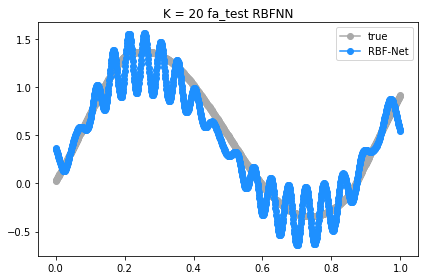

In [ ]:
X = fa_test_x
X = np.sort(X, axis=0)
noise = fa_test_y
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=20, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "darkgray")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "dodgerblue")
plt.legend()

plt.title("K = 20 fa_test RBFNN")
plt.tight_layout()
plt.show()

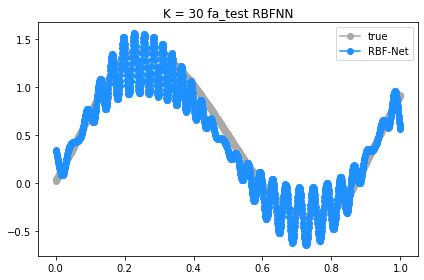

In [ ]:
X = fa_test_x
X = np.sort(X, axis=0)
noise = fa_test_y
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=30, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "darkgray")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "dodgerblue")
plt.legend()

plt.title("K = 30 fa_test RBFNN")
plt.tight_layout()
plt.show()

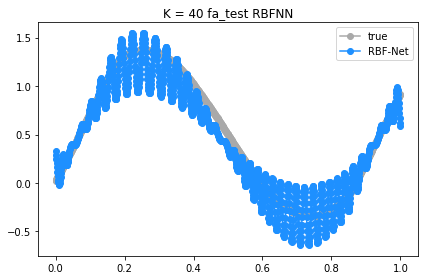

In [ ]:
X = fa_test_x
X = np.sort(X, axis=0)
noise = fa_test_y
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=40, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "darkgray")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "dodgerblue")
plt.legend()

plt.title("K = 40 fa_test RBFNN")
plt.tight_layout()
plt.show()

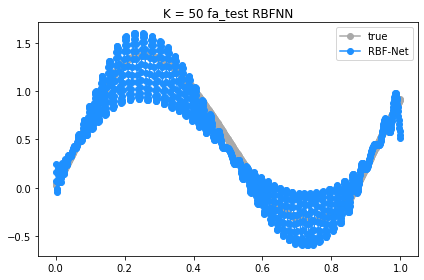

In [ ]:
X = fa_test_x
X = np.sort(X, axis=0)
noise = fa_test_y
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=50, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true', color = "darkgray")
plt.plot(X, y_pred, '-o', label='RBF-Net', color = "dodgerblue")
plt.legend()

plt.title("K = 50 fa_test RBFNN")
plt.tight_layout()
plt.show()